#pyspark datatypes

## The core syntax for reading data in Apache Spark

**DataFrameReader.format(…).option(“key”, “value”).schema(…).load()**

DataFrameReader is the foundation for reading data in Spark, it can be accessed via the attribute spark.read

* format — specifies the file format as in CSV, JSON, or parquet. The default is parquet.
* option — a set of key-value configurations to parameterize how to read data
schema — optional one used to specify if you would like to infer the schema from the data source.
* Read Modes — Often while reading data from external sources we encounter corrupt data, read modes instruct Spark to handle corrupt data in a specific way.


#Read modes

There are 3 typical read modes and the default read mode is permissive.

* permissive — All fields are set to null and corrupted records are placed in a string column called _corrupt_record
* dropMalformed — Drops all rows containing corrupt records.
* failFast — Fails when corrupt records are encountered.

# The core syntax for writing data in Apache Spark

DataFrameWriter.format(...).option(...).partitionBy(...).bucketBy(...).sortBy( ...).save() 

The foundation for writing data in Spark is the DataFrameWriter, which is accessed per-DataFrame using the attribute dataFrame.write

Save modes — specifies what will happen if Spark finds data already at the destination.

There are 4 typical save modes and the default mode is errorIfExists

* append — appends output data to files that already exist
* overwrite — completely overwrites any data present at the destination
* errorIfExists — Spark throws an error if data already exists at the destination
* ignore — if data exists do nothing with the dataFrame

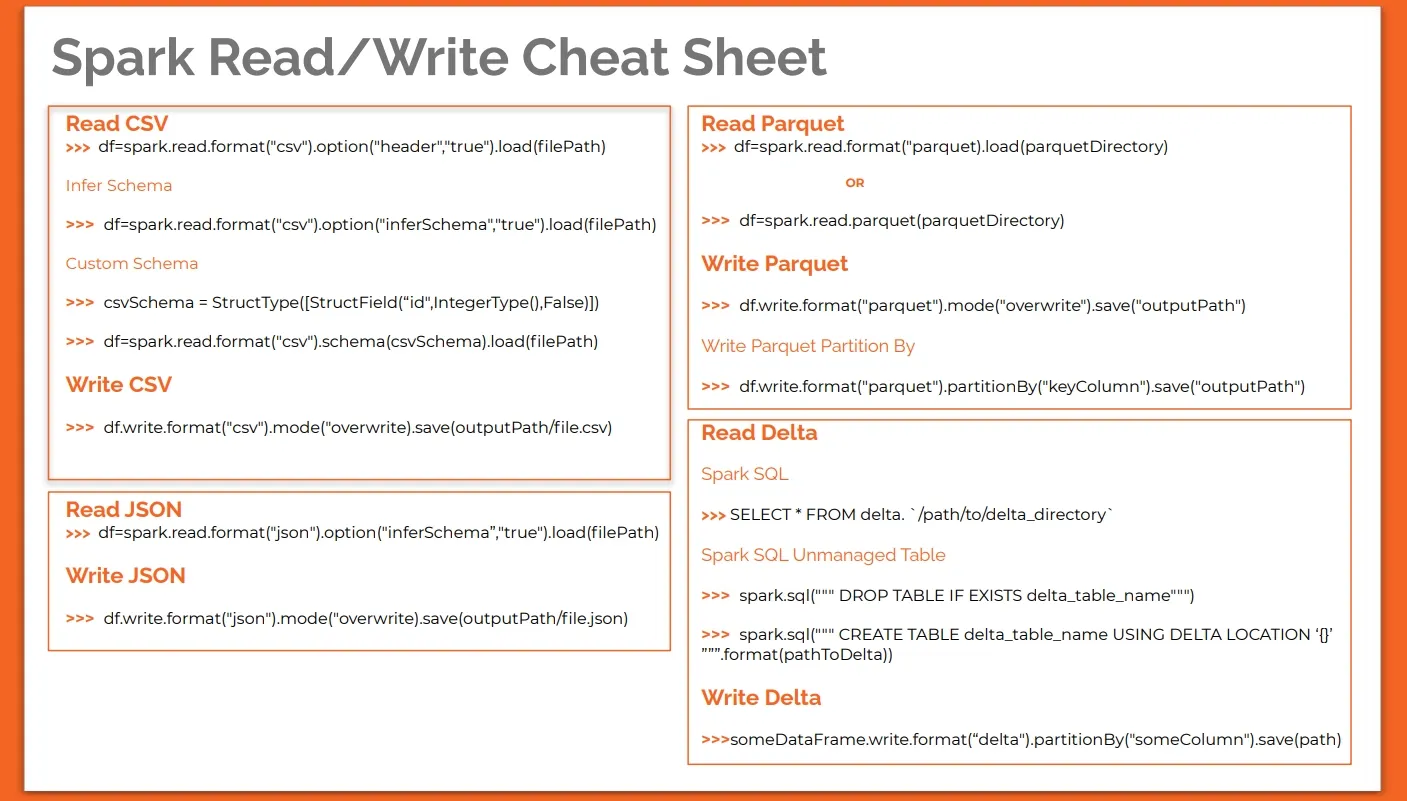

In [8]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 19.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=8b10525b75cf31c00ea65dcce5207dca25cb3f72483c29df584883bdfeb4007a
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Import SparkSession
from pyspark.sql import SparkSession

# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Check Spark Session Information
spark

## 1. CSV files

In [ ]:
!unzip "/content/drive/MyDrive/BlackFridaySale.zip"

### How to read from CSV files?

In [12]:
df=spark.read.format("csv").option("header","true").load("train.csv")

### Reading CSV using InferSchema

In [13]:
df=spark.read.format("csv").option("inferSchema","true").load("train.csv")

In [14]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)



In [15]:
df.show()

+-------+----------+------+-----+----------+-------------+--------------------+--------------+------------------+------------------+------------------+--------+
|    _c0|       _c1|   _c2|  _c3|       _c4|          _c5|                 _c6|           _c7|               _c8|               _c9|              _c10|    _c11|
+-------+----------+------+-----+----------+-------------+--------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|  Age|Occupation|City_Category|Stay_In_Current_C...|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
|1000001| P00069042|     F| 0-17|        10|            A|                   2|             0|                 3|              null|              null|    8370|
|1000001| P00248942|     F| 0-17|        10|            A|                   2|             0|                 1|                 6|                14|   15200|
|1000001| P00087842|     F| 0-17| 

## Lazy evaluation

### Reading CSV using user-defined Schema

In [18]:
from pyspark.sql.types import StructType, StructField, IntegerType

csvSchema = StructType([StructField("_c4",IntegerType(),False)])

df=spark.read.format("csv").schema(csvSchema).load("train.csv")

## How to Write CSV Data?

In [20]:
df.write.format("csv").mode("overwrite").save("new_train.csv")

In [22]:
ls new_train.csv

part-00000-06ca9d00-d1c5-46d1-971a-27505d89eda1-c000.csv  _SUCCESS
part-00001-06ca9d00-d1c5-46d1-971a-27505d89eda1-c000.csv


## 2. JSON files

In [23]:
import json
 
# Data to be written
dictionary = [{ "Text1":"hello", "Text2":"goodbye", "Num1":5, "Array1":[7,8,9] },
{ "Text1":"this", "Text2":"that", "Num1":6.6, "Array1":[77,88,99] },
{ "Text1":"yes", "Text2":"no", "Num1":-0.03, "Array1":[555,444,222] }]
 
with open("sample.json", "w") as outfile:
    json.dump(dictionary, outfile)

### How to Read from JSON file?

In [24]:
df=spark.read.format("json").option("inferSchema","True").load("sample.json")

In [25]:
df.show()

+---------------+-----+-----+-------+
|         Array1| Num1|Text1|  Text2|
+---------------+-----+-----+-------+
|      [7, 8, 9]|  5.0|hello|goodbye|
|   [77, 88, 99]|  6.6| this|   that|
|[555, 444, 222]|-0.03|  yes|     no|
+---------------+-----+-----+-------+



### Reading json using user-defined Schema

In [26]:
jsonSchema = StructType([StructField("Array1",IntegerType(),False)])
df=spark.read.format("json").schema(jsonSchema).load("sample.json")

### How to Write to JSON file?


In [28]:
df.write.format("json").mode("overwrite").save("new_sample.json")

## 3. Parquet files

In [30]:
import pandas as pd
import os

data = [['krish', 10], ['abhi', 15], ['ram', 14]]

df = pd.DataFrame(data, columns = ['Name', 'Age'])

df.to_parquet("dataframe.parquet")

In [31]:
print("Listing the contents of the current directory:")
print(os.listdir('.'))

Listing the contents of the current directory:
['.config', 'drive', 'new_sample.json', 'new_train.csv', 'train.csv', 'test.csv', 'dataframe.parquet', 'sample.json', 'sample_data']


### How to Read data from Parquet files?


In [32]:
#option1
df=spark.read.format("parquet").load("dataframe.parquet")

In [33]:
#option2
df=spark.read.parquet("dataframe.parquet")

### How to Write data to Parquet files?



In [34]:
df.write.format("parquet").mode("overwrite").save("new_dataframe.parquet")